In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')
import random
import nltk
nltk.download('punkt')  # Ensure the standard punkt tokenizer is installed
nltk.download('averaged_perceptron_tagger')  # Sometimes required for tokenization
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RajBu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RajBu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RajBu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
train_df = pd.read_csv("sentiment_train.csv")
print(train_df.shape)
print(train_df.head(500))

(45615, 2)
                                                  text  label
0    "QT @user In the original draft of the 7th boo...      2
1    "Ben Smith / Smith (concussion) remains out of...      1
2    Sorry bout the stream last night I crashed out...      1
3    Chase Headley's RBI double in the 8th inning o...      1
4    @user Alciato: Bee will invest 150 million in ...      2
..                                                 ...    ...
495  "Your 3rd gen. iPad with Retina display is wor...      1
496  "From the Twitter just now from RNDM: """"RNDM...      1
497  @user @user You are a Patriot! Such compassion...      2
498  "Watching Les Mis 25th Anniversary concert. Ho...      0
499  I\u2019d want Mannone\u002cJenks/sagna\u002cpe...      1

[500 rows x 2 columns]


In [6]:
print(train_df.columns)


Index(['text', 'label'], dtype='object')


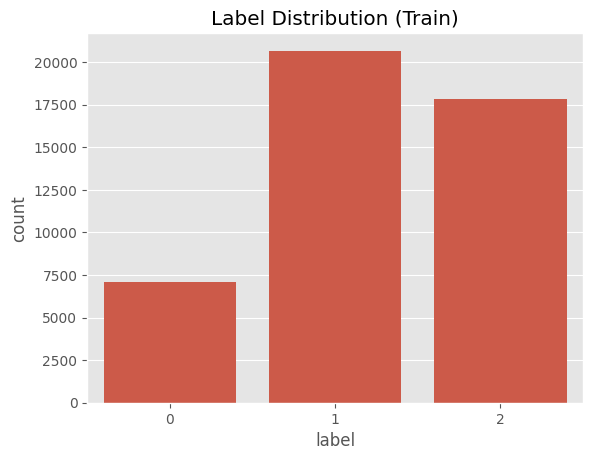

In [ ]:
train_df = train_df.reset_index(drop=True)


sns.countplot(x=, data=train_df)
plt.title("Label Distribution (Train)")
plt.show()
    

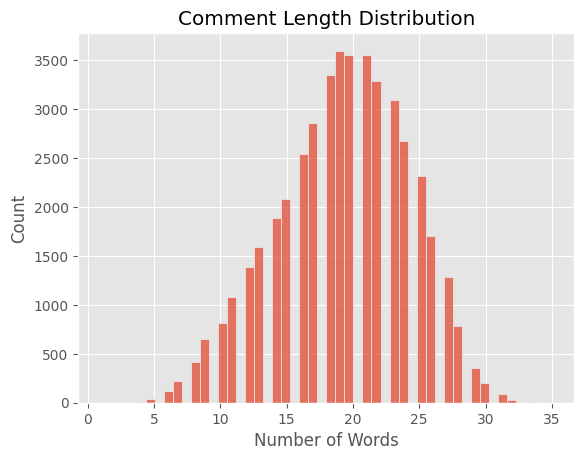

In [8]:
train_df["text_length"] = train_df["text"].apply(lambda x: len(x.split()))
sns.histplot(train_df["text_length"], bins=50)
plt.title("Comment Length Distribution")
plt.xlabel("Number of Words")
plt.show()


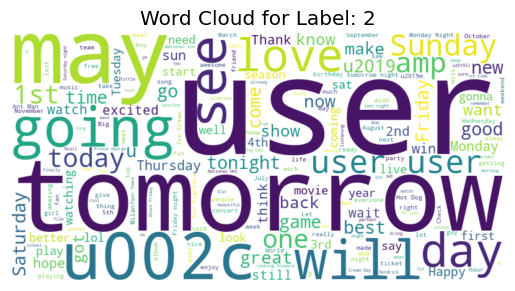

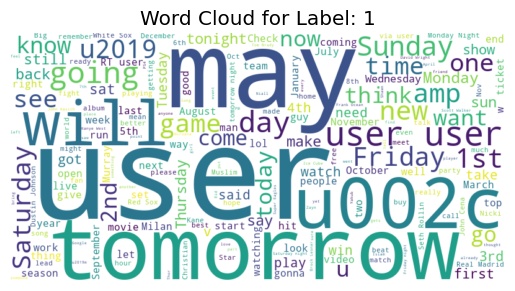

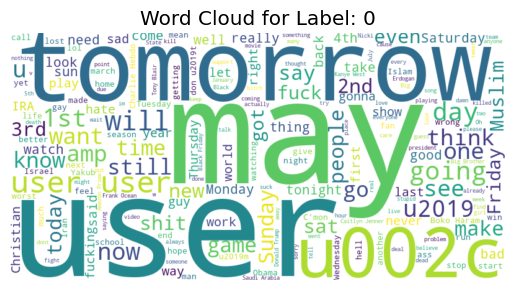

In [9]:
from wordcloud import WordCloud

for label in train_df["label"].unique():
    text = " ".join(train_df[train_df["label"] == label]["text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Label: {label}")
    plt.show()


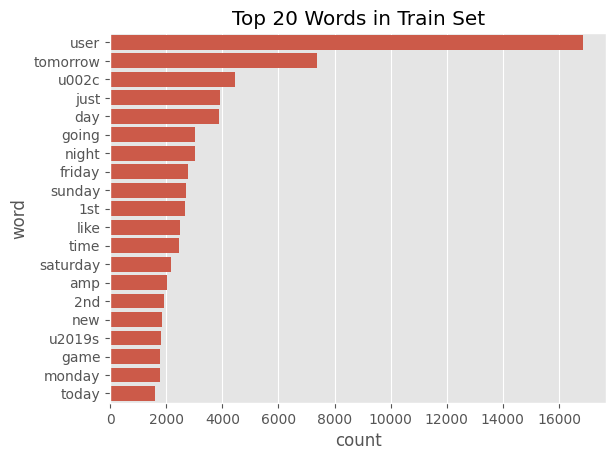

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

vec = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vec.fit_transform(train_df["text"])
word_counts = X_counts.sum(axis=0).A1
words = vec.get_feature_names_out()

freq_df = pd.DataFrame({"word": words, "count": word_counts})
top_words = freq_df.sort_values(by="count", ascending=False).head(20)

sns.barplot(data=top_words, x="count", y="word")
plt.title("Top 20 Words in Train Set")
plt.show()


these graphs dont show much due to words that are common among all tweets not indicitive of the meaning of the tweet

In [11]:
print("Nulls in train:", train_df.isnull().sum())
print("Duplicates in train:", train_df.duplicated().sum())


Nulls in train: text           0
label          0
text_length    0
dtype: int64
Duplicates in train: 26


In [12]:
def decode_unicode_escape(text):
    return text.encode('utf-8').decode('unicode_escape')

# Apply the decoding function to the raw text
train_df["text"] = train_df["text"].apply(decode_unicode_escape)


C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\m'
  return text.encode('utf-8').decode('unicode_escape')
C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\_'
  return text.encode('utf-8').decode('unicode_escape')
C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\/'
  return text.encode('utf-8').decode('unicode_escape')
C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\o'
  return text.encode('utf-8').decode('unicode_escape')
C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\l'
  return text.encode('utf-8').decode('unicode_escape')
C:\Users\RajBu\AppData\Local\Temp\ipykernel_59004\520395486.py:2: DeprecationWarning: invalid escape sequence '\,'
  return text.encode('utf-8').decod

In [13]:
import re

def better_clean(text):
    text = text.lower()
    text = re.sub(r"@user", "", text)                            # Remove placeholders like 'user'
    text = re.sub(r"u\d{4}", "", text)                         # Remove strings like 'u002c'
    text = re.sub(r"\\u[\dA-Fa-f]{4}", "", text)                # Remove unicode
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)         # Remove URLs
    text = re.sub(r"\d+(st|nd|rd|th)", "", text)                # Remove 1st, 2nd, etc.
    text = re.sub(r"\d+", "", text)                             # Remove standalone numbers
    text = re.sub(r"[^a-z\s]", "", text)                        # Remove punctuation/symbols
    text = re.sub(r"\s+", " ", text).strip()                    # Normalize whitespace
    return text

train_df["clean_text"] = train_df["text"].apply(better_clean)


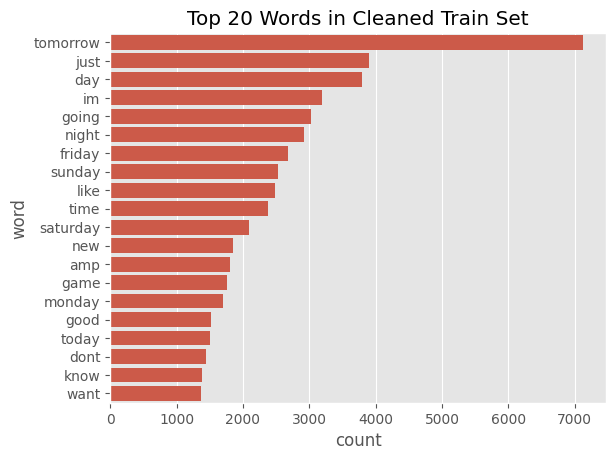

In [14]:
# Example: most common words
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vec.fit_transform(train_df["clean_text"])
word_counts = X_counts.sum(axis=0).A1
words = vec.get_feature_names_out()

freq_df = pd.DataFrame({"word": words, "count": word_counts})
top_words = freq_df.sort_values(by="count", ascending=False).head(20)

sns.barplot(data=top_words, x="count", y="word")
plt.title("Top 20 Words in Cleaned Train Set")
plt.show()


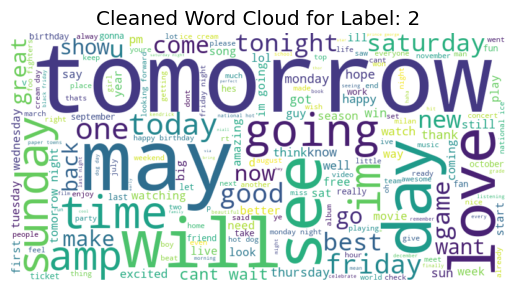

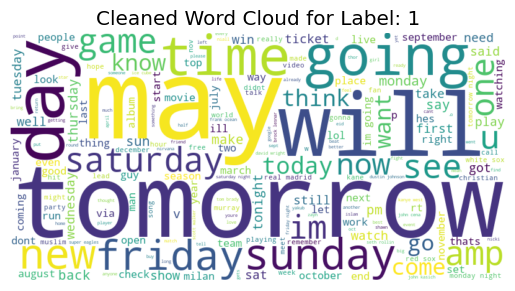

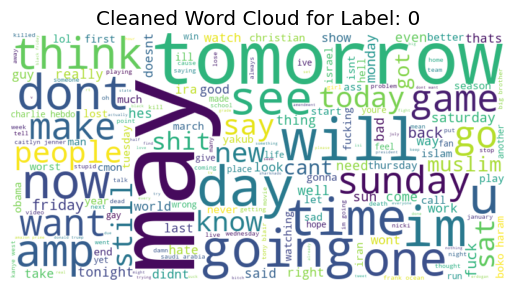

In [15]:
for label in train_df["label"].unique():
    text = " ".join(train_df[train_df["label"] == label]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cleaned Word Cloud for Label: {label}")
    plt.show()


In [16]:
print(train_df.columns)

Index(['text', 'label', 'text_length', 'clean_text'], dtype='object')


In [17]:
# Temporarily change pandas settings to display the full column
pd.set_option('display.max_colwidth', None)


# Display the entire "text" column as a string
print(train_df["clean_text"].to_string(index=False))


                                       qt in the original draft of the book remus lupin survived the battle of hogwarts happybirthdayremuslupin
                                                                    ben smith smith concussion remains out of the lineup thursday curtis nhl sj
                     sorry bout the stream last night i crashed out but will be on tonight for sure then back to minecraft in pc tomorrow night
            chase headleys rbi double in the inning off david price snapped a yankees streak of consecutive scoreless innings against blue jays
                                                   alciato bee will invest million in january another in the summer and plans to bring messi by
                                                      lit my mum kerry the louboutins i wonder how many willam owns look kerry warner wednesday
                               soul train oct halloween special ft tdot finest rocking the miccrazy cactus night club adv ticket wt out 

nubmers may be important to certain contexts of comments 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Split texts by label
toxic_texts = train_df[train_df['label'] == 0]['text']
neutral_texts = train_df[train_df['label'] == 1]['text']
nontoxic_texts = train_df[train_df['label'] == 2]['text']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on all text to get a consistent vocabulary
tfidf.fit(train_df['text'])

# Transform each class separately
toxic_tfidf = tfidf.transform(toxic_texts)
neutral_tfidf = tfidf.transform(neutral_texts)
nontoxic_tfidf = tfidf.transform(nontoxic_texts)



In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Prepare texts for each label
toxic_texts = train_df[train_df['label'] == 0]['text']
neutral_texts = train_df[train_df['label'] == 1]['text']
nontoxic_texts = train_df[train_df['label'] == 2]['text']

# Function to extract top bigrams
def get_top_bigrams(texts, max_features=50):
    vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=max_features)
    bigrams = vectorizer.fit_transform(texts)
    return vectorizer.get_feature_names_out()

# Print top bigrams for each class
print("Top toxic bigrams:")
print(get_top_bigrams(toxic_texts))

print("\nTop neutral bigrams:")
print(get_top_bigrams(neutral_texts))

print("\nTop non-toxic bigrams:")
print(get_top_bigrams(nontoxic_texts))


Top toxic bigrams:
['amazon prime day' 'arrested bloody sunday' 'boko haram militants'
 'caitlyn jenner charged' 'caitlyn jenner face' 'charlie hebdo attack'
 'charlie hebdo attacks' 'charlie hebdo march' 'clicking link touchwiz'
 'day black friday' 'dustin johnson just' 'ed sheeran concert'
 'face manslaughter charge' 'face manslaughter charges'
 'foo fighters concert' 'frank ocean album' 'friday night lights'
 'galaxy ii wiped' 'ghost rider spirit' 'good friday agreement'
 'hot dog day' 'hulk hogan racist' 'ii wiped just' 'january charlie hebdo'
 'jenner charged manslaughter' 'jenner face manslaughter'
 'just clicking link' 'kanye west president' 'link touchwiz devices'
 'magic mike xxl' 'miss teen usa' 'monday night football'
 'national hot dog' 'pretty little liars' 'rugby world cup'
 'sam smith concert' 'season big brother' 'st patrick day' 'star wars day'
 'thursday night football' 'touchwiz devices vulnerable' 'user don think'
 'user user 2nd' 'user user don' 'user user ira' 'us

determined this dataset is not ideal